In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
import os

In [3]:
train_dir = '/content/drive/MyDrive/UBC_Sc/UBC-OCEAN_CS640/final_train_imgs/train'
test_dir = '/content/drive/MyDrive/UBC_Sc/UBC-OCEAN_CS640/final_train_imgs/test'

In [4]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [5]:
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

In [6]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)


In [7]:
pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.0 MB/s eta 0:00:00


In [8]:
import timm
model = timm.create_model('efficientnet_b3', pretrained=True, num_classes=len(train_dataset.classes))

model.safetensors:   0%|          | 0.00/49.3M [00:00<?, ?B/s]

In [9]:
# model = models.densenet121(pretrained=True)
# num_ftrs = model.classifier.in_features
# model.classifier = nn.Linear(num_ftrs, len(train_dataset.classes))

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Epoch 1/50, Average Loss: 2.9403


Epoch 2/50, Average Loss: 0.5949


Epoch 3/50, Average Loss: 0.2120


Epoch 4/50, Average Loss: 0.1230


Epoch 5/50, Average Loss: 0.0695


Epoch 6/50, Average Loss: 0.0248


Epoch 7/50, Average Loss: 0.0429


Epoch 8/50, Average Loss: 0.0166


Epoch 9/50, Average Loss: 0.0081


Epoch 10/50, Average Loss: 0.0030


Epoch 11/50, Average Loss: 0.0025


Epoch 12/50, Average Loss: 0.0025


Epoch 13/50, Average Loss: 0.0016


Epoch 14/50, Average Loss: 0.0008


Epoch 15/50, Average Loss: 0.0007


Epoch 16/50, Average Loss: 0.0004


Epoch 17/50, Average Loss: 0.0005


Epoch 18/50, Average Loss: 0.0003


Epoch 19/50, Average Loss: 0.0003


Epoch 20/50, Average Loss: 0.0001


Epoch 21/50, Average Loss: 0.0002


Epoch 22/50, Average Loss: 0.0001


Epoch 23/50, Average Loss: 0.0002


Epoch 24/50, Average Loss: 0.0003


Epoch 25/50, Average Loss: 0.0001


Epoch 26/50, Average Loss: 0.0002


Epoch 27/50, Average Loss: 0.0001


Epoch 28/50, Average Loss: 0.0002


Epoch 29/50, Average Loss: 0.0001


Epoch 30/50, Average Loss: 0.0001


Epoch 31/50, Average Loss: 0.0527


Epoch 32/50, Average Loss: 0.0635


Epoch 33/50, Average Loss: 0.0671


Epoch 34/50, Average Loss: 0.0597


Epoch 35/50, Average Loss: 0.2705


Epoch 36/50, Average Loss: 0.8446


Epoch 37/50, Average Loss: 0.7318


Epoch 38/50, Average Loss: 0.5492


Epoch 39/50, Average Loss: 0.3152


Epoch 40/50, Average Loss: 0.2972


Epoch 41/50, Average Loss: 0.1373


Epoch 42/50, Average Loss: 0.1397


Epoch 43/50, Average Loss: 0.1345


Epoch 44/50, Average Loss: 0.1057


Epoch 45/50, Average Loss: 0.0560


Epoch 46/50, Average Loss: 0.0890


Epoch 47/50, Average Loss: 0.1308


Epoch 48/50, Average Loss: 0.0756


Epoch 49/50, Average Loss: 0.0872


Epoch 50/50, Average Loss: 0.0999


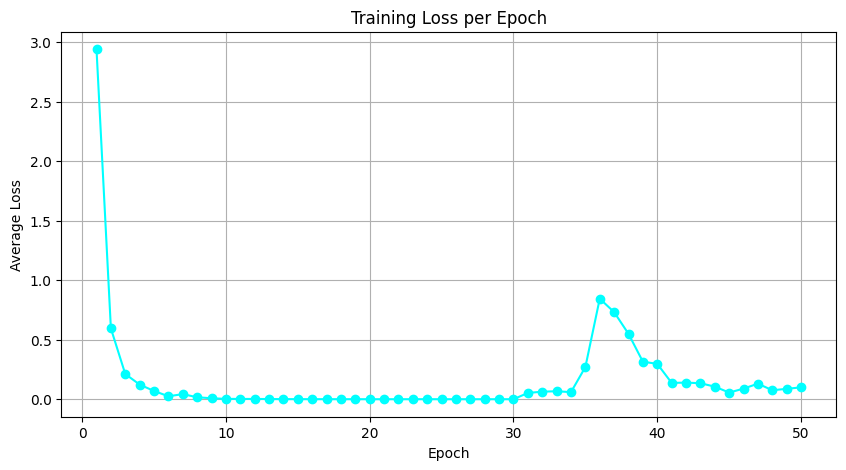

In [11]:
from tqdm import tqdm
import matplotlib.pyplot as plt

num_epochs = 50
loss_values = []
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    loop = tqdm(train_loader, total=len(train_loader), leave=False)

    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        epoch_loss += loss.item()

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update tqdm loop with training loss
        loop.set_description(f'Epoch [{epoch+1}/{num_epochs}]')
        loop.set_postfix(loss=loss.item())

    loop.close()
    average_epoch_loss = epoch_loss / len(train_loader)
    loss_values.append(average_epoch_loss)  # Append the average loss for the epoch
    print(f'Epoch {epoch+1}/{num_epochs}, Average Loss: {average_epoch_loss:.4f}')

# Plotting the training loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), loss_values, marker='o', color='cyan')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.grid(True)
plt.show()

In [12]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 53.49%


In [18]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 98.26%


In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
model.eval()
true_labels = []
predicted_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

conf_mat = confusion_matrix(true_labels, predicted_labels)

total = len(true_labels)
correct = sum(np.array(true_labels) == np.array(predicted_labels))
accuracy = 100 * correct / total
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 53.49%


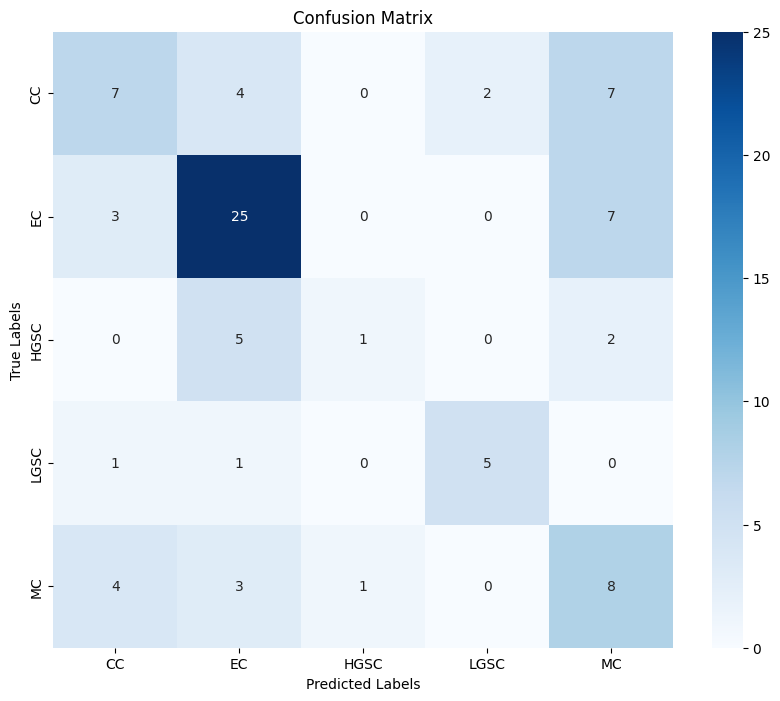

In [14]:
class_names = ['CC', 'EC', 'HGSC', 'LGSC', 'MC']
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [15]:
from PIL import Image, ImageFile

Image.MAX_IMAGE_PIXELS = None
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [16]:
from torch.utils.data import Dataset
from PIL import Image
import pandas as pd

class TestDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.test_df = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.test_df)

    def __getitem__(self, idx):
        # Explicitly convert the image ID to string
        img_id = str(self.test_df.iloc[idx, 0])
        img_name = os.path.join(self.root_dir, img_id + '.jpg')  # Adjust file extension if necessary
        image = Image.open(img_name).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    #transforms.CenterCrop((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_dir_2='/content/drive/MyDrive/UBC_Sc/UBC-OCEAN_CS640/test_images_compressed_80'
test_dataset_2 = TestDataset(csv_file='/content/drive/MyDrive/UBC_Sc/UBC-OCEAN_CS640/test (2).csv', root_dir=test_dir_2, transform=test_transform)
test_loader_2 = DataLoader(test_dataset_2, batch_size=1, shuffle=False)


In [17]:
model.eval()
predicted_labels_2 = []

with torch.no_grad():
    for images in test_loader_2:
        images = images.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        predicted_labels_2.append(predicted.item())

# Map numeric labels back to class names if necessary
class_names = ['CC', 'EC', 'HGSC', 'LGSC', 'MC']
predicted_class_labels = [class_names[label] for label in predicted_labels_2]


In [19]:
import pandas as pd
predicted_class_labels = [class_names[label] for label in predicted_labels_2]

test_csv_path = '/content/drive/MyDrive/UBC_Sc/UBC-OCEAN_CS640/test (2).csv'
test_df = pd.read_csv(test_csv_path)

In [20]:
print("Number of predictions:", len(predicted_class_labels))
print("Number of entries in test.csv:", len(test_df))

Number of predictions: 108
Number of entries in test.csv: 108


In [21]:
assert len(predicted_class_labels) == len(test_df), "Number of predictions does not match number of test samples"


In [22]:
test_df['label'] = predicted_class_labels

In [23]:
output_csv_path = '/content/drive/MyDrive/UBC_Sc/UBC-OCEAN_CS640/Copy of test (2).csv'
test_df.to_csv(output_csv_path, index=False)

In [16]:
# predicted_labels = []
# with torch.no_grad():
#     for images, _ in test_loader:
#         images = images.to(device)
#         outputs = model(images)
#         _, predicted = torch.max(outputs.data, 1)
#         predicted_labels.append(predicted.item())
# class_names = test_dataset.classes
# predicted_class_labels = [class_names[label] for label in predicted_labels]

In [17]:
# test_csv_path = '/content/drive/MyDrive/UBC_Sc/UBC-OCEAN_CS640/test.csv'
# test_df = pd.read_csv(test_csv_path)
# assert len(predicted_class_labels) == len(test_df), "Number of predictions does not match number of test samples"
# test_df['label'] = predicted_class_labels
# output_csv_path = '/content/drive/MyDrive/UBC_Sc/UBC-OCEAN_CS640/test (2).csv'
# test_df.to_csv(output_csv_path, index=False)